In [1]:
#Import packages
import numpy as np
import pandas as pd

In [2]:
#Loading the train data
train_data = pd.read_parquet('../input/amex-parquet/train_data.parquet')
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [3]:
train_data.shape

(5531451, 191)

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
train_data.isna().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
B_2               2016
R_1                  0
S_3            1020544
D_41              2016
B_3               2016
D_42           4740137
D_43           1658396
D_44            274319
B_4                  0
D_45              2017
B_5                  0
R_2                  0
D_46           1211699
D_47                 0
D_48            718725
D_49           4985917
B_6                233
B_7                  0
B_8              22268
D_50           3142402
D_51                 0
B_9                  0
R_3                  0
D_52             29563
P_3             301492
B_10                 0
D_53           4084585
S_5                  0
B_11                 0
S_6                  0
D_54              2016
R_4                  0
S_7            1020544
B_12                 0
S_8                  0
D_55            184803
D_56           2990943
B_13             49519
R_5        

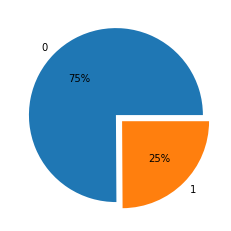

In [5]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = train_data['target'].value_counts()
keys = [0,1]
explode = [0, 0.1]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')

# displaying chart
plt.show()

**25% is default and remaining 75% is non default** - Only 25 % of credit card holders are not paybacking their credit amount in 120 days and 75% of customers are following their credits due perfectly

In [6]:
train_data.select_dtypes(['object'])

,customer_ID,S_2,D_63,D_64
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,CR,O
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,CR,O
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,CR,O
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,CR,O
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,CR,O
...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,CL,O
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,CL,O
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,CL,O
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,CL,O


In [7]:
train_data["D_63"].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [8]:
train_data['D_64'].unique()

array(['O', 'R', None, 'U', '-1'], dtype=object)

In [9]:
print(train_data['D_63'].isna().sum())
print(train_data['D_64'].isna().sum())

0
217442


"D_64" coulmn contains negative values,First remove the negative values and then concentrate on encoding

In [10]:
train = train_data.dropna(axis=1, thresh=int(0.80 * len(train_data)))
train.shape

(5531451, 157)

In [11]:
train=train.set_index(['customer_ID'])
train=train.ffill().bfill()
train=train.reset_index()
train=train.groupby('customer_ID').tail(1)
train=train.set_index(['customer_ID'])

# Drop date column since it is no longer relevant

train.drop(['S_2'],axis=1,inplace=True)

# Check for number of rows
train.shape

(458913, 155)

In [12]:
# Perform one-hot encoding for D_63 and D_64
train_D63 = pd.get_dummies(train[['D_63']])
train = pd.concat([train, train_D63], axis=1)
train = train.drop(['D_63'], axis=1)

train_D64 = pd.get_dummies(train[['D_64']])
train = pd.concat([train, train_D64], axis=1)
train = train.drop(['D_64'], axis=1)

In [13]:
train1=train.corr().abs()>0.4

In [14]:
train.drop(train.columns[train.corrwith(train['target']).abs()<0.4],axis=1,inplace=True)

In [15]:
train.shape

(458913, 27)

In [16]:
y = train['target']
X = train.drop(['target'],axis=1)

<AxesSubplot:>

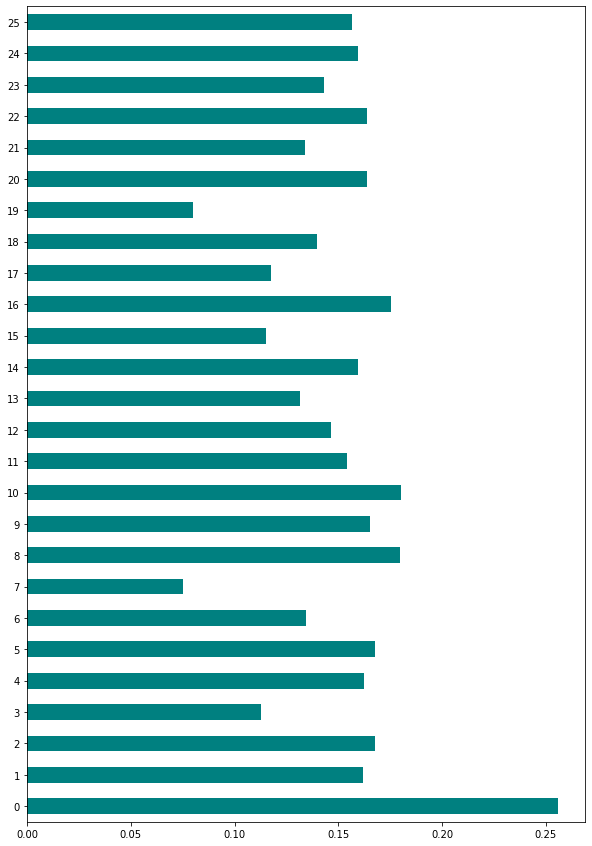

In [17]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(15)
importances= mutual_info_classif(X,y)
featureimp=pd.Series(importances)
featureimp.plot(kind='barh',color="teal")

Looks like almost all the features giving some importances towards the results,So we will include select all the parameters based on mutual_info technique 

In [18]:
from xgboost import XGBClassifier
model=XGBClassifier(objective='binary:logistic')
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
list_of_columns=list(train.columns)
list_of_columns.remove('target')
list_of_columns.append('customer_ID')

test = pd.read_parquet('../input/amex-parquet/test_data.parquet',columns=list_of_columns)
test.head()

,P_2,B_1,B_2,R_1,B_3,D_44,B_4,R_2,D_48,B_7,B_9,B_11,D_55,D_58,D_61,B_16,B_18,B_19,B_20,B_22,B_23,D_74,D_75,B_33,B_37,B_38,customer_ID
0,0.631315,0.010728,0.814497,0.007547,0.002347,0.007584,0.116402,0.005178,0.626467,1.250677,0.001013,0.004416,0.114564,0.205898,0.588734,0.008663,0.592103,0.009144,0.004986,0.005210,1.134792,0.217694,0.204590,1.003810,0.007970,1.0,00000469ba478561f23a92a868bd366de6f6527a684c9a...
1,0.587042,0.011026,0.810848,0.001817,0.009132,0.006646,0.134878,0.009029,0.611682,0.234169,0.005533,0.010003,0.184116,0.403270,0.622886,0.000835,0.590922,0.000165,0.001557,0.008394,0.208381,0.216526,0.206570,1.004629,0.015463,1.0,00000469ba478561f23a92a868bd366de6f6527a684c9a...
2,0.609056,0.016390,1.004620,0.000114,0.004192,0.009606,0.136109,0.008286,0.622228,0.126995,0.000023,0.004140,0.253969,0.393717,0.617996,0.006182,0.591441,0.006097,0.002339,0.002630,0.115770,0.223477,0.204640,1.007063,0.016206,2.0,00000469ba478561f23a92a868bd366de6f6527a684c9a...
3,0.614911,0.021672,0.816549,0.009722,0.015325,0.007820,0.146546,0.008305,0.615620,0.144631,0.007204,0.013309,0.305662,0.416276,0.614086,0.009910,0.590951,0.002537,0.006877,0.004402,0.131948,0.216830,0.203464,1.009508,0.018480,2.0,00000469ba478561f23a92a868bd366de6f6527a684c9a...
4,0.591673,0.015923,0.810456,0.002026,0.011281,0.009959,0.135725,0.002728,0.591795,0.178240,0.000569,0.006974,0.350231,0.398535,0.592988,0.000131,0.593366,0.001112,0.007519,0.000384,0.153263,0.214919,0.201180,1.001869,0.015362,2.0,00000469ba478561f23a92a868bd366de6f6527a684c9a...


In [20]:
test=test.set_index(['customer_ID'])
test=test.ffill().bfill()
test=test.reset_index()
test=test.groupby('customer_ID').tail(1)
test=test.set_index(['customer_ID'])

In [21]:
test_prediction = model.predict_proba(test) 

In [22]:
# Retrieve the probability of default
y_predict_final = test_prediction[:,1]

# Reset index of test
test = test.reset_index()

# Merge the prediction and customer_ID into submission dataframe
submission = pd.DataFrame({"customer_ID":test.customer_ID,"prediction":y_predict_final})

submission.to_csv('submission.csv', index=False)